# Correlate immune and MYCv2 signaling NES

Script related to figure s3h, i

### Aim:
- Evaluate correlation of immune and MYCv2 signaling NES

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

In [2]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Load data

In [3]:
file_keys = home + "/Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt"

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [4]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


In [5]:
sample_labels.index

Index(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10',
       'A11', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09',
       'B10', 'B11', 'B12', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07',
       'C08', 'C09', 'C10', 'C11', 'C12', 'D01', 'D02', 'D03'],
      dtype='object', name='Well')

In [6]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("Set1", 8).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

In [7]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

sample_labels['Site_marker'] = sample_labels['Site'].replace(sites,markers)

In [8]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


In [9]:
mRNA_tumcell_file = home + "/Data/1/TreatmentNaive_log2exp_loess_norm_filtered_ESTIMATE.txt"

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

In [10]:
mRNA_tumcell.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,213.898183,441.185072,627.161634,-257.879171,-105.932457,-179.742309,-667.871861,-554.187271,-467.547274,-424.048973,...,276.215651,819.700176,542.094611,446.049523,100.214812,640.683420,1028.302292,631.494907,843.594952,-393.705822
ImmuneScore,789.397143,1103.963967,996.569838,119.238243,354.124225,197.378769,-395.243536,-16.422432,-469.452988,-563.011739,...,-18.442529,526.734281,-25.089182,238.412959,-60.730519,890.081437,776.296638,680.327079,892.726571,-226.504212
ESTIMATEScore,1003.295326,1545.149039,1623.731472,-138.640928,248.191767,17.636459,-1063.115397,-570.609703,-937.000262,-987.060713,...,257.773122,1346.434456,517.005428,684.462482,39.484294,1530.764858,1804.598930,1311.821985,1736.321523,-620.210034
TumorPurity,0.730147,0.673548,0.664978,0.833913,0.801248,0.821034,0.900910,0.867208,0.892722,0.896009,...,0.800405,0.694819,0.777021,0.761314,0.819199,0.675108,0.644917,0.698464,0.652544,0.870811


In [11]:
sample_labels['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity']

In [12]:
file_nes = home + "/Data/1/HallmarksStromaImmune_NES.txt"

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

In [13]:
data_nes.index

Index(['HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_HYPOXIA',
       'HALLMARK_CHOLESTEROL_HOMEOSTASIS', 'HALLMARK_MITOTIC_SPINDLE',
       'HALLMARK_WNT_BETA_CATENIN_SIGNALING', 'HALLMARK_TGF_BETA_SIGNALING',
       'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_DNA_REPAIR',
       'HALLMARK_G2M_CHECKPOINT', 'HALLMARK_APOPTOSIS',
       'HALLMARK_NOTCH_SIGNALING', 'HALLMARK_ADIPOGENESIS',
       'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ESTROGEN_RESPONSE_LATE',
       'HALLMARK_ANDROGEN_RESPONSE', 'HALLMARK_MYOGENESIS',
       'HALLMARK_PROTEIN_SECRETION', 'HALLMARK_INTERFERON_ALPHA_RESPONSE',
       'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_APICAL_JUNCTION',
       'HALLMARK_APICAL_SURFACE', 'HALLMARK_HEDGEHOG_SIGNALING',
       'HALLMARK_COMPLEMENT', 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE',
       'HALLMARK_PI3K_AKT_MTOR_SIGNALING', 'HALLMARK_MTORC1_SIGNALING',
       'HALLMARK_E2F_TARGETS', 'HALLMARK_MYC_TARGETS_V1',
       'HALLMARK_MYC_TARGETS_V2', 'HALLMARK_EPITHELIAL_MES

In [18]:
sample_labels['MYCv2'] = data_nes.loc['HALLMARK_MYC_TARGETS_V2']

In [19]:
sample_labels['Immune'] = data_nes.loc['ImmuneSignature']

In [20]:
x = "MYCv2"
y = "Immune"

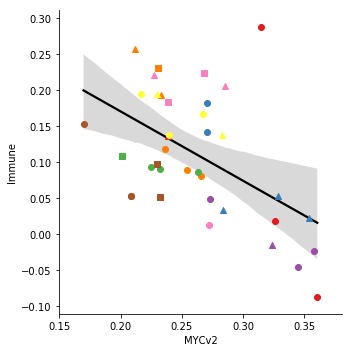

In [21]:
g = sns.lmplot(x=x,
               y=y,
               data=sample_labels,
               truncate=True,
               scatter_kws={'color':'None'},
               line_kws={'color':'k',
                         'zorder':0})

for sample in sample_labels.index:
    
    x_tumcell = sample_labels[x][sample]
    y_tumcell = sample_labels[y][sample]
    colour = sample_labels.Colour[sample]
    marker = sample_labels.Site_marker[sample]
    
    plt.scatter(x_tumcell,
                y_tumcell,
                marker=marker,
                c=colour,
                zorder=1)
    
sns.despine(trim=False)

In [22]:
ls ../../Figures/supplementary/3/

OVCT_Fig_s3.pdf.zip            panels/
OVCT_Fig_s3.png                s3c_TCGAov_bic_notnormres.pdf
README.md


In [23]:
FILE = "../../Figures/supplementary/3/panels/s3h_MYCv2_Immune_corr.pdf"

g.savefig(FILE, bbox='tight')

### Calculate normality of distribution


In [24]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

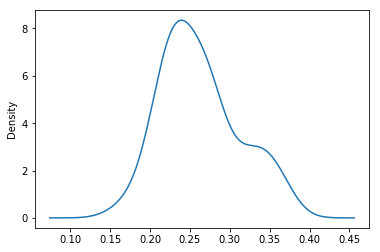

In [25]:
sample_labels[x].dropna().plot(kind="kde")

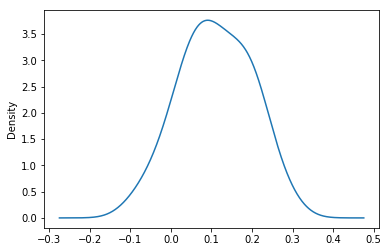

In [26]:
sample_labels[y].dropna().plot(kind="kde")

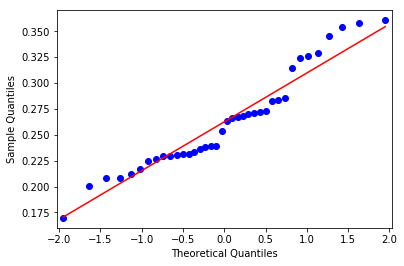

In [27]:
f = qqplot(sample_labels[x].dropna(),
       line='s')

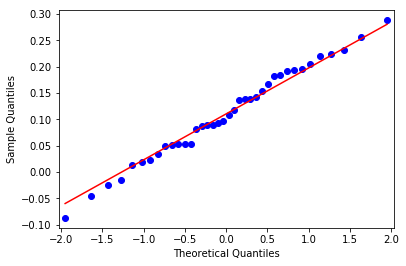

In [28]:
f = qqplot(sample_labels[y].dropna(),line='s')

In [29]:
scipy.stats.shapiro(sample_labels[x].dropna())

# Looks NOT normal

(0.9387230277061462, 0.03808869048953056)

In [30]:
scipy.stats.shapiro(sample_labels[y].dropna())

# Looks normal

(0.9881640672683716, 0.9531522393226624)

In [31]:
scipy.stats.normaltest(sample_labels[x].dropna())

# Looks normal

NormaltestResult(statistic=2.392947764285536, pvalue=0.30225813285428155)

In [32]:
scipy.stats.normaltest(sample_labels[y].dropna())

# Looks normal

NormaltestResult(statistic=0.5585690659583893, pvalue=0.7563246732839647)

In [33]:
scipy.stats.anderson(sample_labels[x].dropna(), 'norm')

# Looks normal

AndersonResult(statistic=0.9340489349268282, critical_values=array([0.529, 0.603, 0.723, 0.844, 1.004]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [34]:
scipy.stats.anderson(sample_labels[y].dropna(), 'norm')

# Looks normal

AndersonResult(statistic=0.18480817937317084, critical_values=array([0.529, 0.603, 0.723, 0.844, 1.004]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [35]:
scipy.stats.bartlett(
    sample_labels[x],
    sample_labels[y]
)

# not same variance (heteroscedastic)

BartlettResult(statistic=13.056871761693362, pvalue=0.0003021737033833252)

In [36]:
scipy.stats.levene(
    sample_labels[x],
    sample_labels[y]
)

# not same variance (heteroscedastic)

LeveneResult(statistic=13.817820263453086, pvalue=0.0003889249299599142)

Use kendall

In [37]:
kendalltau(list(sample_labels.dropna()[x]),
           list(sample_labels.dropna()[y]), method="asymptotic")

KendalltauResult(correlation=-0.3841269841269842, pvalue=0.0009798255368266393)

In [40]:
set(sample_labels["Case_mRNA"])

{1, 4, 5, 6, 10, 13, 16, 17}

### Plot each patient independently

1
4
5
6
10
13
16
17


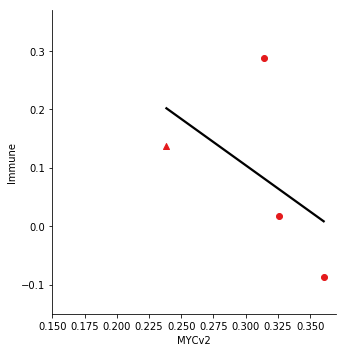

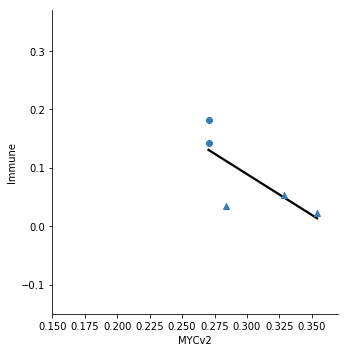

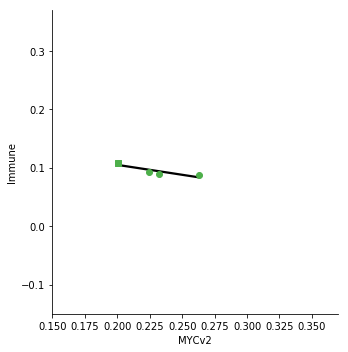

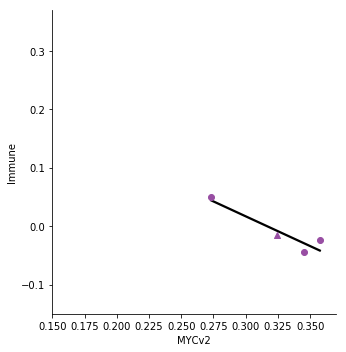

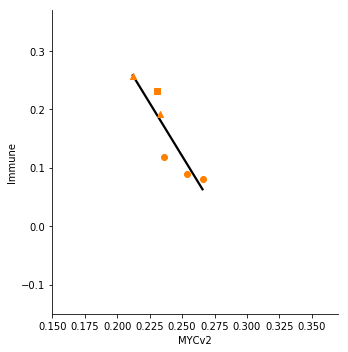

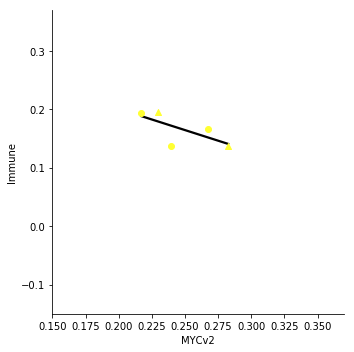

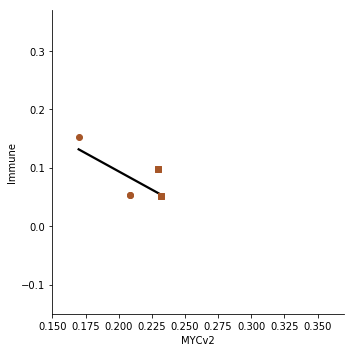

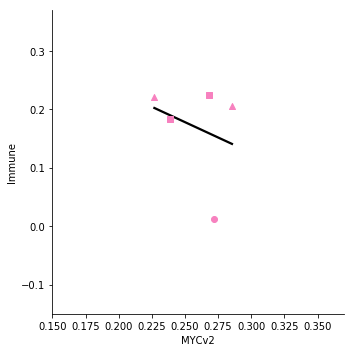

In [39]:
correlations = []
for case in set(sample_labels["Case_mRNA"]):
    
    print(case)
    
    df = sample_labels[sample_labels["Case_mRNA"] == case]

    g = sns.lmplot(x=x,
                   y=y,
                   data=df,
                   truncate=True,
                   ci=None,
                   scatter_kws={'color':'None'},
                   line_kws={'color':'k',
                             'zorder':0})

    for sample in df.index:

        x_tumcell = df[x][sample]
        y_tumcell = df[y][sample]
        colour = df.Colour[sample]
        marker = df.Site_marker[sample]

        plt.scatter(x_tumcell,
                    y_tumcell,
                    marker=marker,
                    c=colour,
                    zorder=1)

    sns.despine(trim=False)
    
    axes = g.axes

    axes[0,0].set_xlim(0.15,0.37)
    axes[0,0].set_ylim(-0.15,0.37)
    
    f = "../../Figures/supplementary/3/panels/s1h_MYCv2_Immune_corr_%s.pdf" % case
    
    g.savefig(f, bbox='tight')

In [40]:
import scipy.stats

In [41]:
df = sample_labels[sample_labels["Case_mRNA"] == 1]

In [42]:
scipy.stats.normaltest(sample_labels[x].dropna())

NormaltestResult(statistic=2.392947764285536, pvalue=0.30225813285428155)

In [43]:
scipy.stats.shapiro(df[x].dropna())[1]

0.5822415947914124

In [44]:
correlations = []
for case in set(sample_labels["Case_mRNA"]):

    print(str(case)+"\n")
    
    df = sample_labels[sample_labels["Case_mRNA"] == case]

    x_values = df[x].values
    y_values = df[y].values

    n1 = scipy.stats.shapiro(x_values)[1]
    n2 = scipy.stats.shapiro(y_values)[1]

    #n3 = scipy.stats.normaltest(x)[1]
    #n4 = scipy.stats.normaltest(y)[1]

    n5 = scipy.stats.anderson(x_values)
    n6 = scipy.stats.anderson(y_values)

    if min([n1,n2]) < 0.05: # it's not normal

        print("NOT normal")

        h1 = scipy.stats.levene(x_values, y_values)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
            #print(h1)
        else:
            print("HOMOscedastic\n")

    else:

        print("Normal")

        h1 = scipy.stats.bartlett(x_values,y_values)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
        else:
            print("HOMOscedastic\n")

    if min([n1,n2,h1]) < 0.05:

        print("KENDALL")

        print(scipy.stats.kendalltau(x_values,y_values,method="asymptotic"))
        
        cor, p_val = scipy.stats.kendalltau(x_values,y_values)

    else:

        print("anderson")

        print(n5[0], n5[1])
        print(n6[0], n6[1])
        print("\n")

        print("PEARSON")
        print(scipy.stats.pearsonr(x_values,y_values))

        print("\n")
        
        cor, p_val = scipy.stats.pearsonr(x_values,y_values)
                
    correlations.append((str(case),cor,p_val))

1

Normal
HOMOscedastic

anderson
0.2869866144036841 [1.317 1.499 1.799 2.098 2.496]
0.16657957840905535 [1.317 1.499 1.799 2.098 2.496]


PEARSON
(-0.505593130943606, 0.49440686905639397)


4

Normal
HOMOscedastic

anderson
0.4216112337150104 [0.72  0.82  0.984 1.148 1.365]
0.39356816077509205 [0.72  0.82  0.984 1.148 1.365]


PEARSON
(-0.745082547037989, 0.14845230713467877)


5

Normal
HOMOscedastic

anderson
0.20688172940704241 [1.317 1.499 1.799 2.098 2.496]
0.407338716145472 [1.317 1.499 1.799 2.098 2.496]


PEARSON
(-0.8904281594898893, 0.10957184051011071)


6

Normal
HOMOscedastic

anderson
0.2888311114919384 [1.317 1.499 1.799 2.098 2.496]
0.3468550866746778 [1.317 1.499 1.799 2.098 2.496]


PEARSON
(-0.932086877043355, 0.06791312295664498)


10

Normal
HETEROscedastic

KENDALL
KendalltauResult(correlation=-0.9999999999999999, pvalue=0.004832240868896145)
13

Normal
HOMOscedastic

anderson
0.22779797010095315 [0.72  0.82  0.984 1.148 1.365]
0.42882940794668656 [0.72  0.82  0.

In [45]:
correlations

[('1', -0.505593130943606, 0.49440686905639397),
 ('4', -0.745082547037989, 0.14845230713467877),
 ('5', -0.8904281594898893, 0.10957184051011071),
 ('6', -0.932086877043355, 0.06791312295664498),
 ('10', -0.9999999999999999, 0.002777777777777778),
 ('13', -0.6914279472120409, 0.19596024555651978),
 ('16', -0.7035442248754684, 0.1849055942091147),
 ('17', -0.19999999999999998, 0.8166666666666667)]

In [46]:
pvals = [corr[2] for corr in correlations]

pvals

[0.49440686905639397,
 0.14845230713467877,
 0.10957184051011071,
 0.06791312295664498,
 0.002777777777777778,
 0.19596024555651978,
 0.1849055942091147,
 0.8166666666666667]

## Compare Myc v2 NES between Low vs High tumor cellularity

In [47]:
sample_labels

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES,TumourCellularity_mRNA,WNT,Immune,MYCv2
Well,,,,,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973,0.730147,0.151231,0.192483,0.233093
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065,0.673548,0.184140,0.256464,0.211932
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551,0.664978,0.186732,0.230664,0.230913
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496,0.833913,0.263275,0.080746,0.265719
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706,0.801248,0.215427,0.117609,0.236332
A06,A06_3640_19_R_Adnexa,case10_Radnexa_green,10,ovary,green,10.0,19,#ff7f00,o,0.6695,0.821034,0.224450,0.089100,0.253874
A07,A07_3436_3_Omentum,case6_omentum_blue,6,omentum,blue,6.0,3,#984ea3,^,0.7275,0.900910,0.246089,-0.014748,0.323947
A08,A08_3436_12_Ovary,case6_ovary_yellow,6,ovary,yellow,6.0,12,#984ea3,o,0.7929,0.867208,0.243030,0.049217,0.273274
A09,A09_3436_13_Ovary,case6_ovary_blue,6,ovary,blue,6.0,13,#984ea3,o,0.7211,0.892722,0.228552,-0.023908,0.357547


In [48]:
TumourCellularity_WES_med = sample_labels["TumourCellularity_WES"].median()

In [49]:
import numpy as np

In [50]:
low = []
high = []
for well in sample_labels.index:
    
    if np.isnan(sample_labels["TumourCellularity_WES"][well]) == False:
    
        TumorCellularity = sample_labels["TumourCellularity_WES"][well]

        if TumorCellularity > TumourCellularity_WES_med:

            high.append(sample_labels[x][well])

        else:

            low.append(sample_labels[x][well])

In [51]:
np.isnan(sample_labels["TumourCellularity_WES"][well])

False

In [52]:
label = []
for i in range(len(low)):
    
    label.append("low")

In [53]:
for i in range(len(high)):
    
    label.append("high")

In [54]:
cold_hot_df = pd.DataFrame({
    "label" : pd.Series(label),
    "MYCv2" : pd.Series(low+high)
})

cold_hot_df

,label,MYCv2
0,low,0.233093
1,low,0.211932
2,low,0.230913
3,low,0.314207
4,low,0.270843
5,low,0.231821
6,low,0.224783
7,low,0.263005
8,low,0.229830
9,low,0.282491


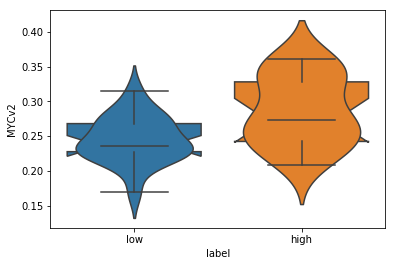

In [55]:
fig, ax = plt.subplots()

sns.violinplot(x="label",
               y="MYCv2",
               data=cold_hot_df,
               inner=None,
               split=False,
               scale="count",
               zorder=0,
               width=0.7,
               alpha=0.3)

sns.boxplot(x="label",
            y="MYCv2",
            data=cold_hot_df,
            notch=True
           )

#ax.set_ylim(0.1,0.3)

In [56]:
fig = ax.get_figure()

In [57]:
fig.savefig("../../Figures/supplementary/3/panels/s3i_MYCv2_WESTumCell_diff.pdf")

In [58]:
import scipy.stats

In [59]:
cold_hot_df

,label,MYCv2
0,low,0.233093
1,low,0.211932
2,low,0.230913
3,low,0.314207
4,low,0.270843
5,low,0.231821
6,low,0.224783
7,low,0.263005
8,low,0.229830
9,low,0.282491


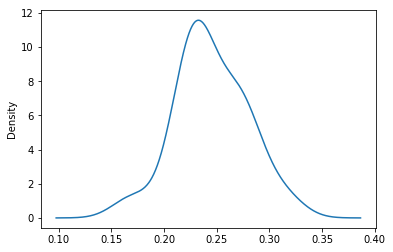

In [61]:
cold_hot_df[cold_hot_df["label"]=="low"]["MYCv2"].dropna().plot(kind="kde")

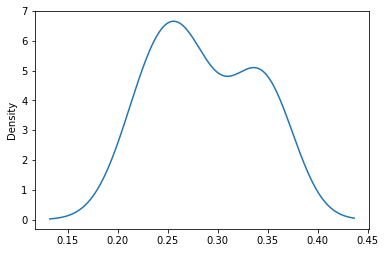

In [62]:
cold_hot_df[cold_hot_df["label"]=="high"]["MYCv2"].dropna().plot(kind="kde")

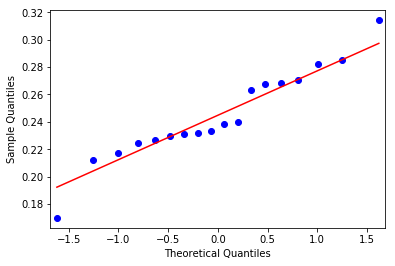

In [63]:
f = qqplot(cold_hot_df[cold_hot_df["label"]=="low"]["MYCv2"].dropna(),line='s')

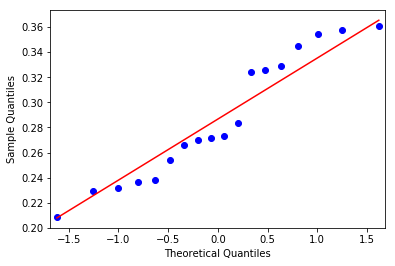

In [64]:
f = qqplot(cold_hot_df[cold_hot_df["label"]=="high"]["MYCv2"].dropna(),line='s')

In [65]:
scipy.stats.shapiro(cold_hot_df[cold_hot_df["label"]=="low"]["MYCv2"].dropna())

# Looks normal

(0.9580491185188293, 0.5644468069076538)

In [66]:
scipy.stats.shapiro(cold_hot_df[cold_hot_df["label"]=="high"]["MYCv2"].dropna())

# Looks normal

(0.9181134104728699, 0.11969926208257675)

In [67]:
scipy.stats.normaltest(cold_hot_df[cold_hot_df["label"]=="low"]["MYCv2"].dropna())

# Looks normal

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.6582200387323224, pvalue=0.7195638464337242)

In [68]:
scipy.stats.normaltest(cold_hot_df[cold_hot_df["label"]=="high"]["MYCv2"].dropna())

# Looks normal

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=4.364945418382563, pvalue=0.11276235710836374)

In [69]:
scipy.stats.anderson(cold_hot_df[cold_hot_df["label"]=="low"]["MYCv2"].dropna(), 'norm')

# Looks normal

AndersonResult(statistic=0.44473905457321905, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [70]:
scipy.stats.anderson(cold_hot_df[cold_hot_df["label"]=="high"]["MYCv2"].dropna(), 'norm')

# Looks normal

AndersonResult(statistic=0.5681115618214712, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [71]:
scipy.stats.bartlett( # for normal distribution
    cold_hot_df[cold_hot_df["label"]=="low"]["MYCv2"].dropna(),
    cold_hot_df[cold_hot_df["label"]=="high"]["MYCv2"].dropna()
)

# NOT same variance (heteroscedasticity)

BartlettResult(statistic=2.6348407301318457, pvalue=0.10454254441828371)

LookS normal and homoscedasticity, so let's use 

In [73]:
scipy.stats.ttest_ind(
    cold_hot_df[cold_hot_df["label"]=="low"]["MYCv2"].dropna(),
    cold_hot_df[cold_hot_df["label"]=="high"]["MYCv2"].dropna(),
    equal_var=True)

Ttest_indResult(statistic=-2.9533812848334766, pvalue=0.005667091483652756)

# End script